In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./Datasets/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.drop(columns=['customerID'], axis='columns', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [14]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [16]:
df.shape

(7043, 20)

In [18]:
df1 = df[df.TotalCharges != ' ']
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

c:\users\flyas\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

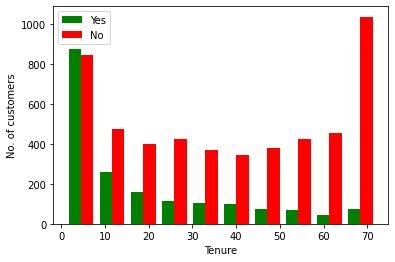

In [25]:
churn_tenure_yes = df1.tenure[df1.Churn == 'Yes']
churn_tenure_no = df1.tenure[df1.Churn == 'No']

plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.hist([churn_tenure_yes,churn_tenure_no], color=['green','red'], label=['Yes','No'])
plt.legend()

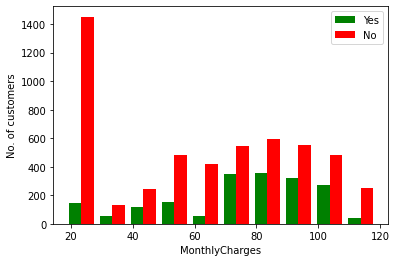

In [26]:
churn_monthlyCharges_yes = df1.MonthlyCharges[df1.Churn == 'Yes']
churn_monthlyCharges_no = df1.MonthlyCharges[df1.Churn == 'No']

plt.xlabel('MonthlyCharges')
plt.ylabel('No. of customers')
plt.hist([churn_monthlyCharges_yes,churn_monthlyCharges_no], color=['green','red'], label=['Yes','No'])
plt.legend()

In [31]:
def show_unique(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} unique: {df[col].unique()}')

In [32]:
show_unique(df1)

gender unique: ['Female' 'Male']
Partner unique: ['Yes' 'No']
Dependents unique: ['No' 'Yes']
PhoneService unique: ['No' 'Yes']
MultipleLines unique: ['No phone service' 'No' 'Yes']
InternetService unique: ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique: ['No' 'Yes' 'No internet service']
OnlineBackup unique: ['Yes' 'No' 'No internet service']
DeviceProtection unique: ['No' 'Yes' 'No internet service']
TechSupport unique: ['No' 'Yes' 'No internet service']
StreamingTV unique: ['No' 'Yes' 'No internet service']
StreamingMovies unique: ['No' 'Yes' 'No internet service']
Contract unique: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique: ['Yes' 'No']
PaymentMethod unique: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn unique: ['No' 'Yes']


In [38]:
df1 = df1.replace('No phone service','No')
df2 = df1.replace('No internet service','No')

In [39]:
show_unique(df2)

gender unique: ['Female' 'Male']
Partner unique: ['Yes' 'No']
Dependents unique: ['No' 'Yes']
PhoneService unique: ['No' 'Yes']
MultipleLines unique: ['No' 'Yes']
InternetService unique: ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique: ['No' 'Yes']
OnlineBackup unique: ['Yes' 'No']
DeviceProtection unique: ['No' 'Yes']
TechSupport unique: ['No' 'Yes']
StreamingTV unique: ['No' 'Yes']
StreamingMovies unique: ['No' 'Yes']
Contract unique: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique: ['Yes' 'No']
PaymentMethod unique: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn unique: ['No' 'Yes']


In [41]:
cols = ['Partner','Dependents', 'PhoneService','MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in cols:
    df2[col].replace({'Yes':1,'No':0}, inplace=True)
    
df2.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [42]:
df2.gender.replace({'Male':1,'Female':0},inplace=True)

In [43]:
df3 = pd.get_dummies(df2, columns=['Contract','InternetService','PaymentMethod'])
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [45]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year              

In [46]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [47]:
X = df3.drop('Churn',axis='columns')
y = df3.Churn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [60]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=70)

Epoch 1/70
176/176 [==============================] - 1s 1ms/step - loss: 0.4892 - accuracy: 0.7664
Epoch 2/70
176/176 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.7959
Epoch 3/70
176/176 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8011
Epoch 4/70
176/176 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8048
Epoch 5/70
176/176 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8075
Epoch 6/70
176/176 [==============================] - 0s 964us/step - loss: 0.4115 - accuracy: 0.8089
Epoch 7/70
176/176 [==============================] - 0s 992us/step - loss: 0.4103 - accuracy: 0.8069
Epoch 8/70
176/176 [==============================] - 0s 997us/step - loss: 0.4087 - accuracy: 0.8091
Epoch 9/70
176/176 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8069
Epoch 10/70
176/176 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 

In [61]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 789us/step - loss: 0.4443 - accuracy: 0.7861


[0.44431620836257935, 0.7860696315765381]

In [65]:
y_pred = model.predict(X_test)
y_pred

array([[0.21014395],
       [0.4856841 ],
       [0.01130512],
       ...,
       [0.74349743],
       [0.677306  ],
       [0.82429063]], dtype=float32)

In [66]:
y_preds = []
for y in y_pred:
    if y>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       999
           1       0.68      0.50      0.57       408

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.77      1407



In [69]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[904,  95],
       [206, 202]])>

Text(33.0, 0.5, 'true')

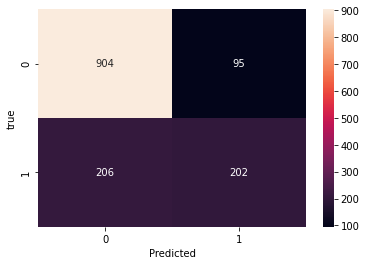

In [71]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("true")